### **Итоговые задания по визуализации**

In [8]:
import pandas as pd
import plotly
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://lms.skillfactory.ru/assets/courseware/v1/e157dad19d7511561f697586ed146dfe/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/churn.zip'
churn_data = pd.read_csv(url, encoding='ISO-8859-1', compression='zip')

### **Задание 9.1**

Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.


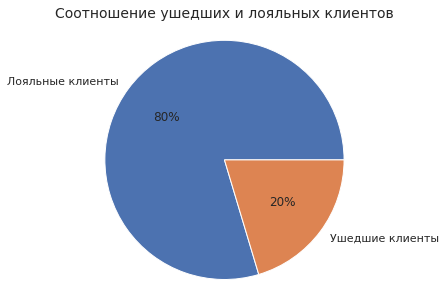

In [29]:
# для корректности легенды добавим уточняющий признак
churn_data['Лояльность клиента'] = churn_data['Exited'].apply(lambda x: 'Ушедшие клиенты' if x == 1 else 'Лояльные клиенты')


gone_ratio = churn_data['Лояльность клиента'].value_counts()

fig = plt.figure(figsize=(5,5))
colors_sns = sns.color_palette()
pie1 = plt.pie(
    gone_ratio,
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    colors=colors_sns,
    autopct='%.0f%%',
    radius=1.1
);

plt.title('Cоотношение ушедших и лояльных клиентов', fontsize=14);
plt.show();

Соотношение ушедших и лояльных клиентов составляет примерно 1 к 4. Уходят примерно 20% всех клиентов банка, а 80% остаются.

### **Задание 9.2**

Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.


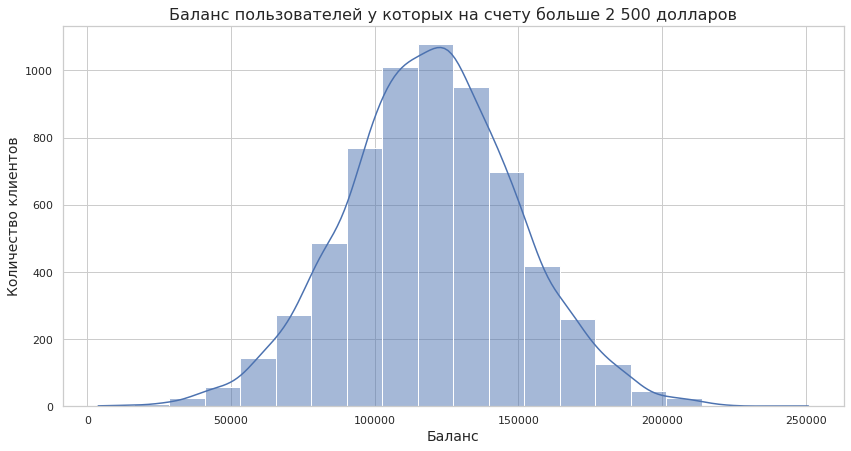

In [10]:
balance_over_2500 = churn_data[churn_data['Balance'] > 2500]

sns.set_style("whitegrid")
fig = plt.figure(figsize=(14,7))
his1 = sns.histplot(
    data=balance_over_2500,
    x='Balance',
    bins=20,
    kde=True
);
his1.set_title('Баланс пользователей у которых на счету больше 2 500 долларов', fontsize=16);
his1.set_xlabel('Баланс', fontsize=14);
his1.set_ylabel('Количество клиентов', fontsize=14);

Распределение баланса пользователей симметрично и уномодально. Это свидетельствует, это оно нормальное, или стремится к нормальному.

Не высоко количество клиентов с небольшими и очень большими балансами.

Наибольшее количество клиентов имеет баланс около 120 тысяч долларов, и в пределах одного стандартного отклонения в меньшую и большую сторону.

### **Задание 9.3**

 Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

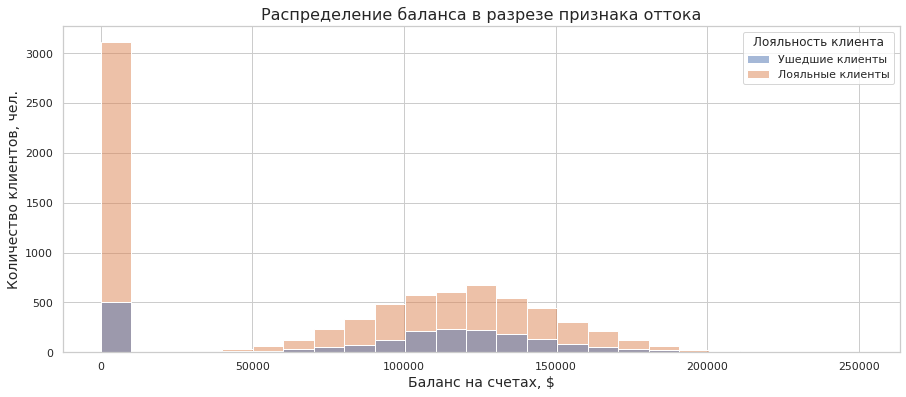

In [11]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(15,6))
his2 = sns.histplot(
    data=churn_data,
    x='Balance',
    hue='Лояльность клиента',
    bins=25
);
sns.set_theme()
his2.set_title('Распределение баланса в разрезе признака оттока', fontsize=16);
his2.set_xlabel('Баланс на счетах, $', fontsize=14);
his2.set_ylabel('Количество клиентов, чел.', fontsize=14);

Без учета выбросов, тип распределения лояльных и ушедших пользователей не отличается.
Наблюдается выброс с нулевым, и около нулевым балансом. У лояльных клиентов выброс гораздо больше.

Для наглядности статистических показателей построим график "боксплот".

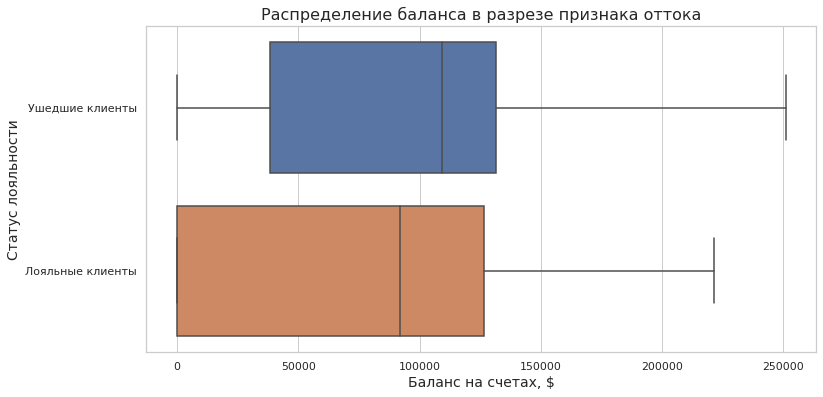

In [12]:
sns.set_style("whitegrid")

fig = plt.figure(figsize=(12, 6))
boxplot1 = sns.boxplot(
    data=churn_data,
    y='Лояльность клиента',
    x='Balance',
    orient='h',
    width=0.8
)
boxplot1.set_title('Распределение баланса в разрезе признака оттока', fontsize=16);
boxplot1.set_xlabel('Баланс на счетах, $', fontsize=14);
boxplot1.set_ylabel('Статус лояльности', fontsize=14);

На графике видно что у лояльных клиентов 25% квантиль лежит на уровне 0$. Это говорит о том, что более четверти лояльных клиентов имеют нулевой баланс на счетах, или близкий к нулю.

На этом основании можно предположить, что большое количество лояльных клиентов не имеют сбережений, и тратят все средства. Их устраивает такое положение дел.

А ушедшие клиенты, в большинстве - люди имеющие сбережения.

Такая ситуация может быть связана с не очень привлекательными финансовыми инструментами для инвестирования. Например низкие процентные ставки по вкладам, большие комиссии по брокерским операциям, или не удобное мобльное приложение с этими функциями.

### **Задание 9.4**

Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

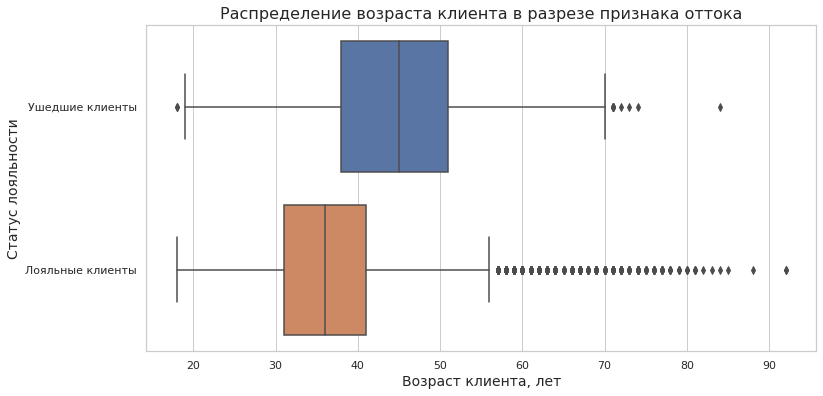

In [13]:
sns.set_style("whitegrid")

fig = plt.figure(figsize=(12, 6))
boxplot2 = sns.boxplot(
    data=churn_data,
    y='Лояльность клиента',
    x='Age',
    orient='h',
    width=0.8
)
boxplot2.set_title('Распределение возраста клиента в разрезе признака оттока', fontsize=16);
boxplot2.set_xlabel('Возраст клиента, лет', fontsize=14);
boxplot2.set_ylabel('Статус лояльности', fontsize=14);

Судя по графику, потенциальных выбросов больше в категории лояльные клиенты. Это потому, что основная часть - клиенты среднего возраста.

Банку стоит обратить внимание на клиентов старше 50, и более пожилого возраста.

### **Задание 9.5**

Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

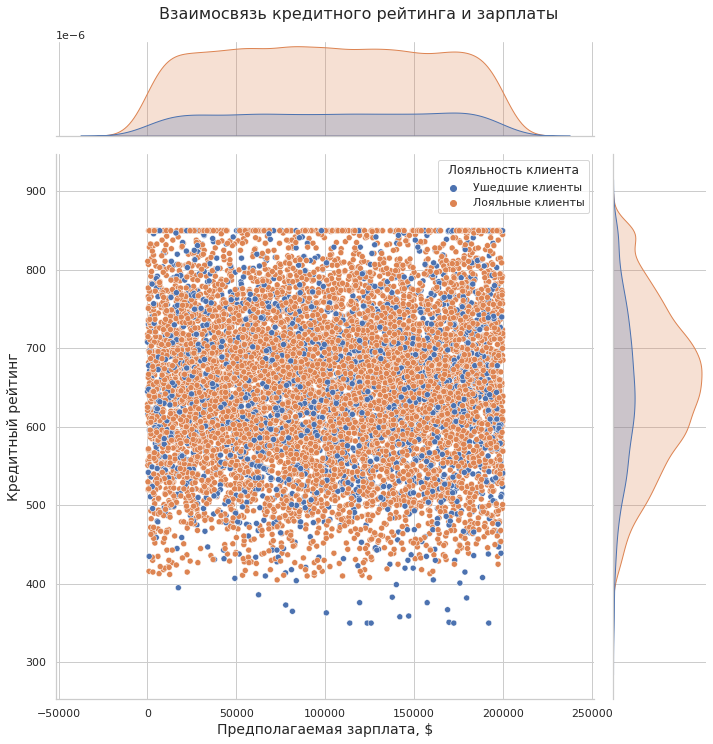

In [14]:
sns.set_style("whitegrid")

joi = sns.jointplot(
    data=churn_data,
    y='CreditScore',
    x='EstimatedSalary',
    hue='Лояльность клиента',
    height=10
);
joi.fig.suptitle('Взаимосвязь кредитного рейтинга и зарплаты', y=1.03, fontsize=16);
joi.set_axis_labels('Предполагаемая зарплата, $', 'Кредитный рейтинг', fontsize=14);

Точки расположены равномерно по всей площади координатной плоскости.
В такой ситуации нельзя обнаружить взаимосвязи между этими признаками.

### **Задание 9.6**

Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

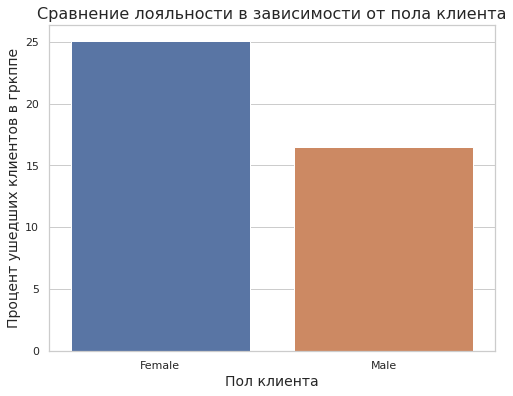

In [15]:
gender_exit = churn_data.groupby(by='Gender', as_index=False)['Exited'].mean()
gender_exit['Exited'] = gender_exit['Exited'] * 100
gender_exit.rename(columns={'Gender': 'Пол клиента', 'Exited': 'Процент ушедших клиентов в группе'}, inplace=True)

sns.set_style("whitegrid")
fig = plt.figure(figsize=(8, 6))
diag = sns.barplot(
    data=gender_exit,
    x='Пол клиента',
    y='Процент ушедших клиентов в группе'
);
diag.set_title('Сравнение лояльности в зависимости от пола клиента', fontsize=16);
diag.set_xlabel('Пол клиента', fontsize=14);
diag.set_ylabel('Процент ушедших клиентов в гркппе', fontsize=14);

По диаграмме видно, что женщины уходят из банка чаще чем мужчины.

### **Задание 9.7**

Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

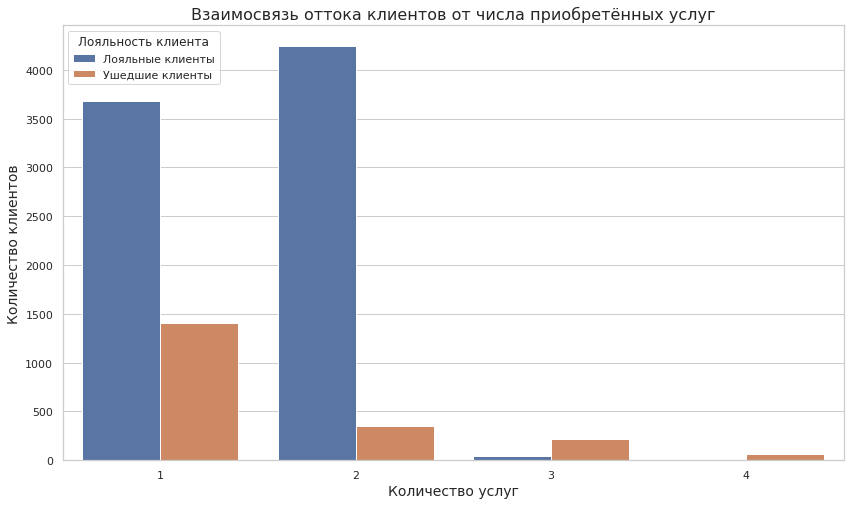

In [16]:
prod_count = churn_data.groupby(['NumOfProducts', 'Лояльность клиента'], as_index=False)['CustomerId'].count()

sns.set_style("whitegrid")
fig = plt.figure(figsize=(14, 8))
diag = sns.barplot(
    data=prod_count,
    x='NumOfProducts',
    y='CustomerId',
    hue='Лояльность клиента'
);
diag.set_title('Взаимосвязь оттока клиентов от числа приобретённых услуг', fontsize=16);
diag.set_xlabel('Количество услуг', fontsize=14);
diag.set_ylabel('Количество клиентов', fontsize=14);

По диаграмме видно, что клиенты с 1 - 2 видами услуг уходили значительно реже тех, у которых 3 услуги. А с 4 услугами - ушли все.
Вывод: возможно клиенты уходят после оказания некоторых некачественных услуг. Необходимо провести анализ перечня услуг, и зависимости оттока клиентов от них.

### **Задание 9.8**

Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

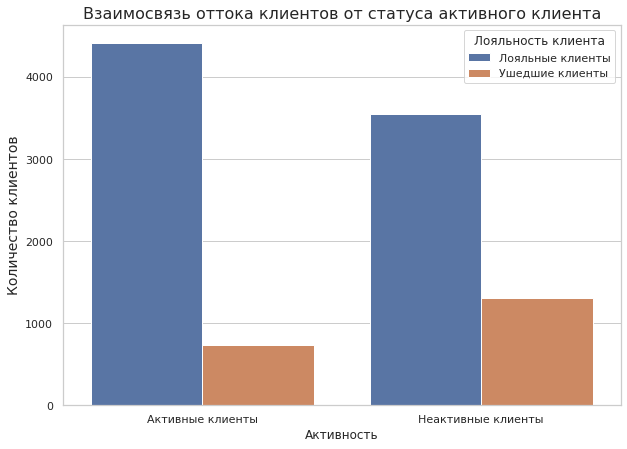

In [17]:
churn_data['Активность'] = churn_data['IsActiveMember'].apply(lambda x: 'Активные клиенты' if x == 1 else 'Неактивные клиенты')
activ_loyal = churn_data.groupby(['Активность', 'Лояльность клиента'], as_index=False)['CustomerId'].count()

sns.set_style("whitegrid")
fig = plt.figure(figsize=(10, 7))
act = sns.barplot(
    data=activ_loyal,
    x='Активность',
    y='CustomerId',
    hue='Лояльность клиента'
);
act.set_title('Взаимосвязь оттока клиентов от статуса активного клиента', fontsize=16);
act.set_ylabel('Количество клиентов', fontsize=14);

По диаграмме видно, что неактивные клиенты уходят чаще активных.

Во-первых, банку необходимо повысить долю онлайн-клиентов всячески продвигая использование мобильного приложения. Это даст возможность в любой момент польучить доступ к банковским операцим, что позитивно повлияет на активность клиентов.

Во-вторых, повышать мотивацию и заинтересовывать:
- льготные тарифы для определённого сегмента клиентов;
- продуктовые или cross-sale льготы;
- персональное обслуживание;
- индивидуальные продукты;
- удобство;
- льготы за активность. 

### **Задание 9.9**

В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [18]:
country_loyal = churn_data[churn_data['Exited'] == 1].groupby(['Geography'], as_index=False)['CustomerId'].count()
country_loyal['Доля ушедших клиентов, %'] = round(((country_loyal['CustomerId'] * 100) / country_loyal['CustomerId'].sum()),2)

country_loyal.rename(columns={'Geography': 'Страна'}, inplace=True)

fig = px.choropleth(
    data_frame=country_loyal,
    locations='Страна',
    locationmode='country names',
    color='Доля ушедших клиентов, %',
    range_color=[0, 100],
    title='Доля ушедших клиентов по странам',
    width=800,
    height=500,
    color_continuous_scale='Blues'
)

fig.show()

По картограмме видно, что в Германии и во Франции одинаковые доли ушедших клиентов, и равняется 40%. А в Испании 20%.

Возможно это связано с тем, что банк располагается в Испании. У клиентов-граждан той же страны, что и место расположения банка доверие больше.

### **Задание 9.10**

Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

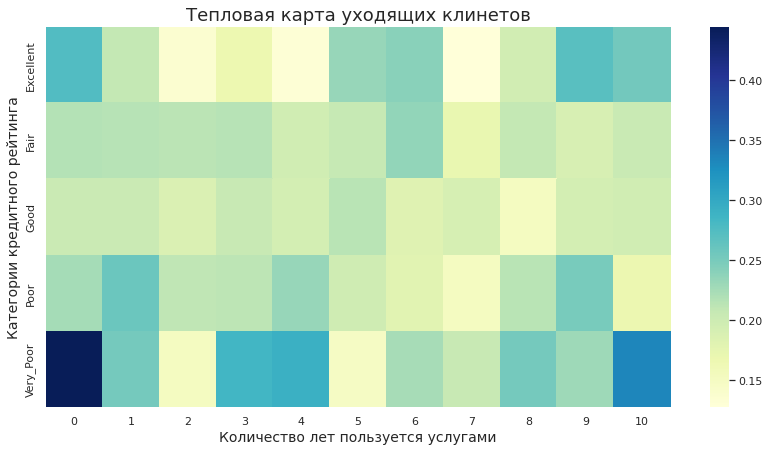

In [19]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

category_gone = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    fill_value=0,
    aggfunc='mean'
)

sns.set(rc={'figure.figsize':(14,7)})
heatmap = sns.heatmap(data=category_gone, cmap='YlGnBu')
heatmap.set_xlabel('Количество лет пользуется услугами', fontsize=14);
heatmap.set_ylabel('Категории кредитного рейтинга', fontsize=14);
heatmap.set_title('Тепловая карта уходящих клинетов', fontsize=18);

По тепловой карте видно, что уходят чаще всего клиенты с самым низким кредитным рейтингом "Very_Poor" в течение первого года использования услг банка.